['Network Size' 'Delivery Rate (TPS)' 'Run Index' 'NAME'
 'Memory(max) (MB)' 'Memory(avg) (MB)' 'CPU(max) (%)' 'CPU(avg) (%)'
 'Traffic In (MB)' 'Traffic Out (MB)' 'Disc Read (B)' 'Disc Write (B)']


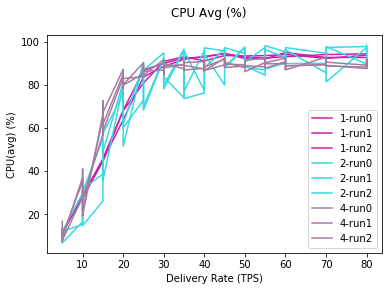

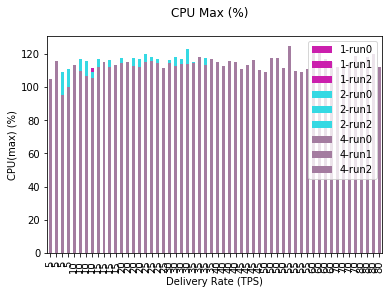

In [5]:
# Resource visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os

DATA = "./resource_summary_124gradient5-80_linear.csv"
df = pd.read_csv(DATA)
print(df.columns.values)

netsizes = list(df["Network Size"].unique())
repeats = df["Run Index"].unique()
number_of_colors = len(netsizes)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

# plot CPU Avg
fig1, ax1 = plt.subplots()
fig1.suptitle("CPU Avg (%)")

for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        subset = subset[subset["NAME"].str.contains("sawtooth-validator")]
        subset.plot(x="Delivery Rate (TPS)", y="CPU(avg) (%)", ax=ax1, label=str(size)+"-run"+str(run), color=color)
ax1.set(xlabel="Delivery Rate (TPS)", ylabel="CPU(avg) (%)")


# plot CPU Max 
fig2, ax2 = plt.subplots()
fig2.suptitle("CPU Max (%)")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        subset = subset[subset["NAME"].str.contains("sawtooth-validator")]
        subset.plot.bar(x="Delivery Rate (TPS)", y="CPU(max) (%)", ax=ax2, label=str(size)+"-run"+str(run), color=color)
ax2.set(xlabel="Delivery Rate (TPS)", ylabel="CPU(max) (%)")
#fig = ax.get_figure()
#fig.savefig("/Users/amiecorso/Desktop/exp1-" + str(netsize) + ".pdf")

plt.show()
